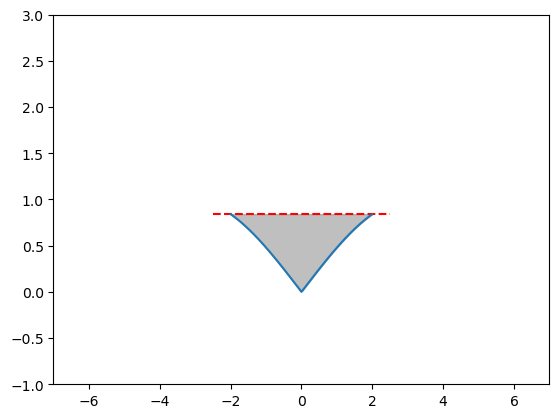

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(np.sin(x/2))

plt.xlim(-7, 7)
plt.ylim(-1, 3)

x = np.arange(-2, 2, 0.01)
max_value = np.max(f(x))

box_x = np.linspace(-2.5, 2.5, 100)
box_y = np.full_like(box_x, max_value)

plt.plot(box_x, box_y, 'r--')
plt.fill_between(box_x, box_y, f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)
plt.plot(x, f(x))

plt.show()

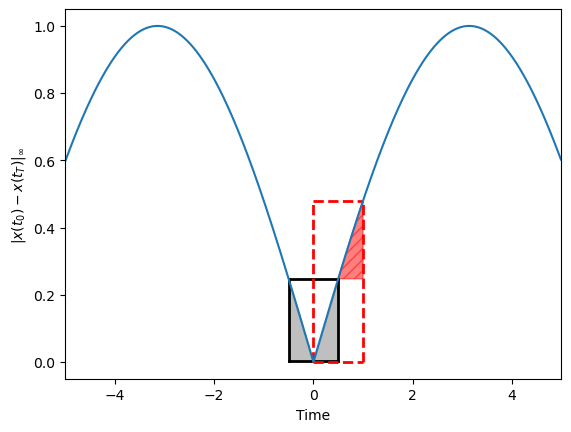

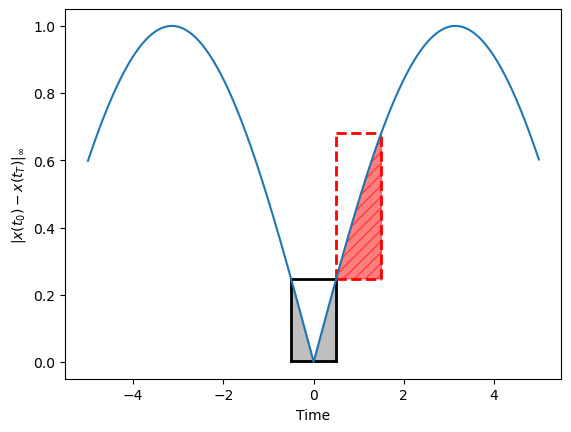

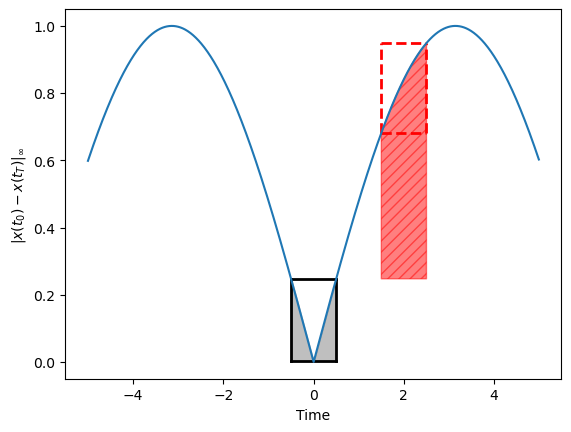

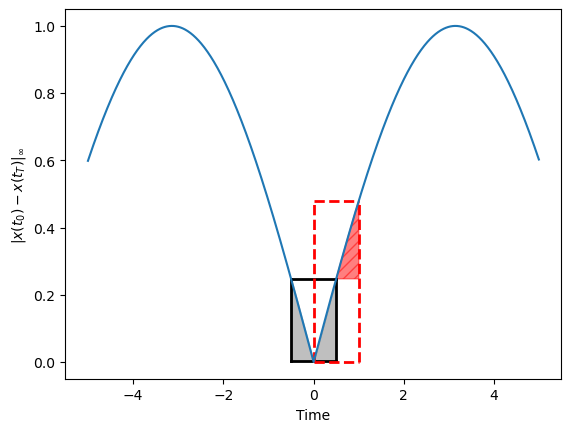

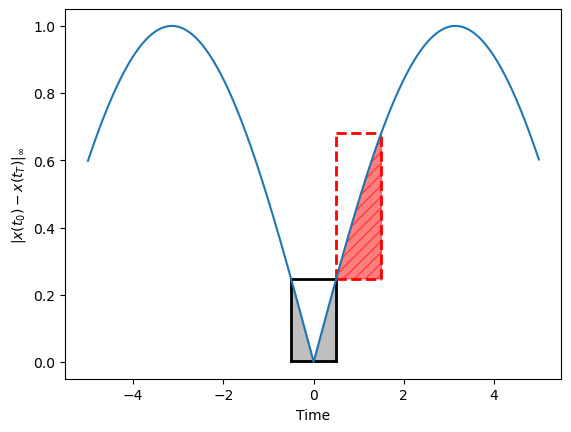

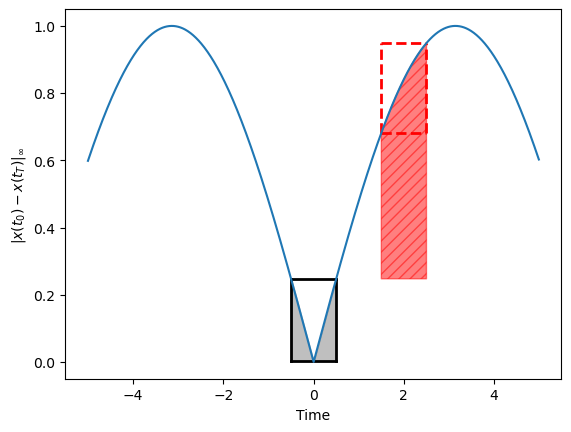

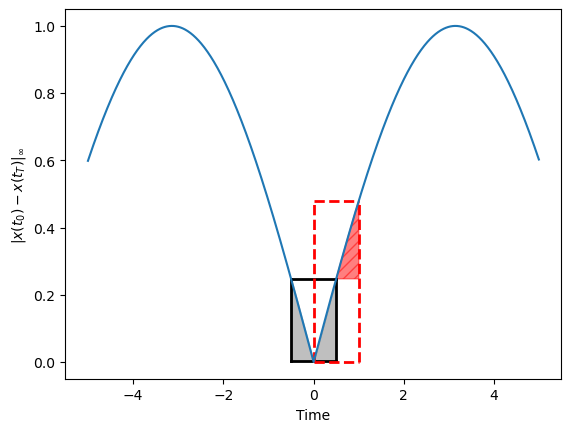

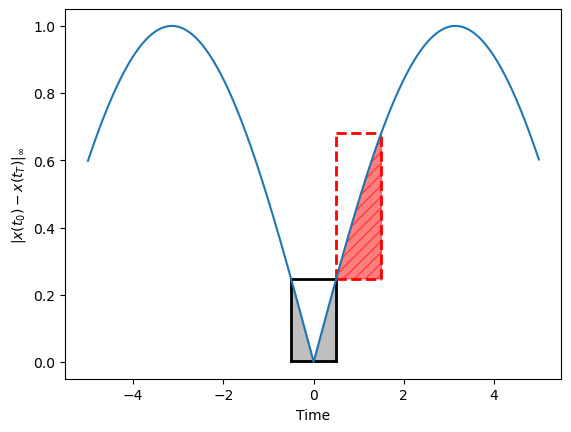

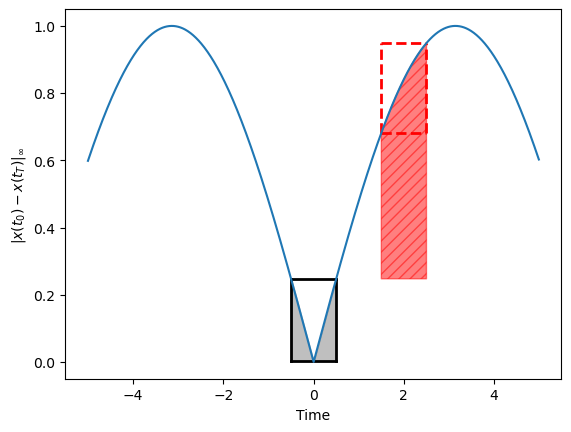

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(np.sin(x/2))

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [0.1, 0.5, 1]:
    for pred_horiz in [0.5 , 1, 2]:
        x = np.arange(-input_length, input_length, 0.01)

        box_x = np.linspace(-0.5, 0.5, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)

        ###############################


        box_x = box_x + pred_horiz
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'r--', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'r--', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'r--', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'r--', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(copy_box_x)), f(box_x), where= ((f(box_x) > np.max(f(copy_box_x)))
                                                                 & (f(box_x) > np.max(f(copy_box_x))))
                         , color='red', alpha=0.5, hatch='///')
        
        plt.plot(x, f(x))

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$")
        plt.show()


f_shifted_box_x.shape : (100,)


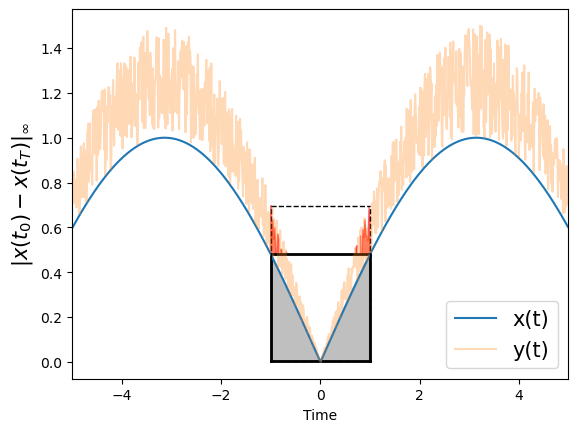

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/2))

def f_shifted(x):
    return np.abs(np.sin(x/2)) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [3]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x), label="y(t)", alpha=0.3)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("csr_with_noise.png", dpi=600)
        plt.show()


f_shifted_box_x.shape : (100,)


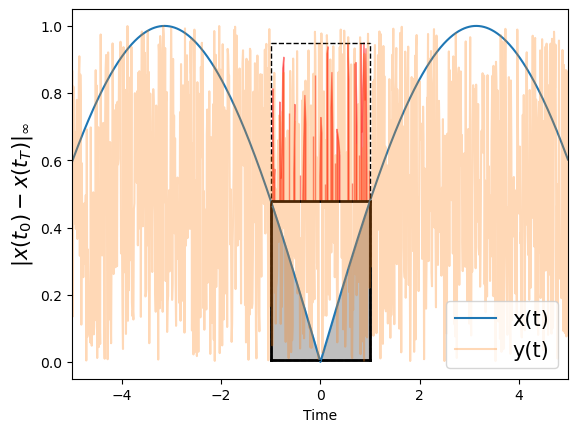

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/2))

def f_shifted(x):
    return np.random.sample(f(x).shape) # np.abs(np.sin(x/2)) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [3]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x), label="y(t)", alpha=0.3)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("garbage_model.png", dpi=600)
        plt.show()


In [33]:
f(box_x).shape

(100,)

f_shifted_box_x.shape : (100,)


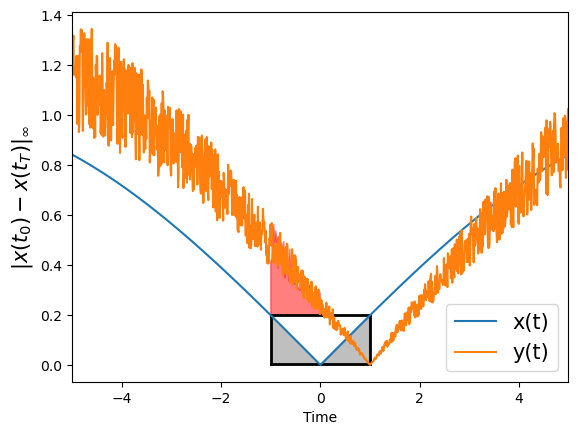

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/5))

def f_shifted(x, pred_horiz):
    return f(x-pred_horiz) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [1]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x, pred_horiz) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        # plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        # plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        # plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        # plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x, pred_horiz), label="y(t)", alpha=1)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("csr_with_sine_shift.png")        
        plt.show()
